# Herrera Monteza Jherson Miguel

In [229]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style            # Libreria para estilos de graficos
plt.style.use(['science', 'notebook']) 

## Problema 3

In [230]:

def euler(funcion, h, yo, xo, y = None, x = None):
    if y is None:
        y = [yo]
    if x is None:
        x = [xo]
    tiempo = np.arange(1,2+h,h)
    for i in range(len(tiempo)-1):
        xi = x[i] + h
        yi = y[i] + h * funcion(tiempo[i], y[i])
        x.append(xi)
        y.append(yi)
    return x, y

In [231]:
funcion1 = lambda t, y: 1/t**2-y/t-y**2

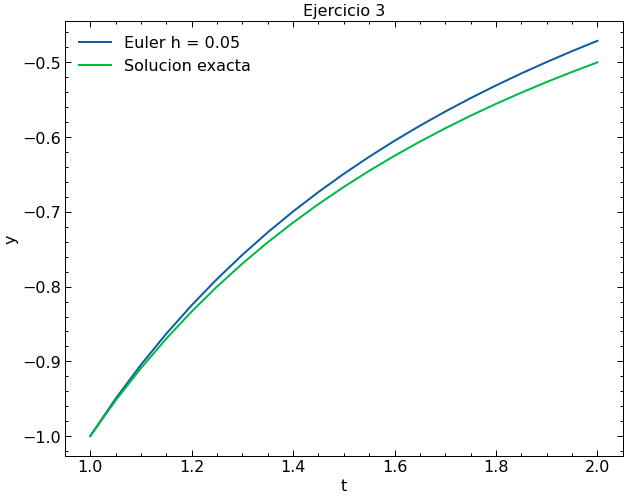

In [232]:
x, y = euler(funcion1, 0.05, -1, 1)
fig = plt.figure(figsize=(10,8))
plt.plot(x, y, label = 'Euler h = 0.05')

tiemp = np.arange(1,2+0.05,0.05)
yexacta = -1/tiemp
plt.plot(tiemp, yexacta, label = 'Solucion exacta')
plt.title('Ejercicio 3')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

## Problema 1


In [233]:
vo = 0 # m/s velocidad inicial

In [234]:
def lineal(velocidad):
    return -9.8 -0.1*velocidad

def cuadratica(velocidad):
    return -9.8+0.1*velocidad**2

In [235]:
# Definimos el algorítmo de runge kutta
def runge_kutta(funcion, h, yo, xo, x = None, y = None):
    if y is None:
        y = [yo]
    if x is None:
        x = [xo]
    tiempo = np.arange(0,20+h,h)
    for i in range(len(tiempo)-1):
        k1 = h*funcion(y[i])
        kl1 = h*funcion(x[i])
        k2 = h*funcion(y[i]+0.5*k1)
        kl2 = h*funcion(x[i]+0.5*kl1)
        k3 = h*funcion(y[i]+0.5*k2)
        kl3 = h*funcion(x[i]+0.5*kl2)
        k4 = h*funcion(y[i]+k3)
        kl4 = h*funcion(x[i]+kl3)
        y.append(y[i]+(k1+2*k2+2*k3+k4)/6)
        x.append(x[i]+(kl1+2*kl2+2*kl3+kl4)/6)
    return y, tiempo

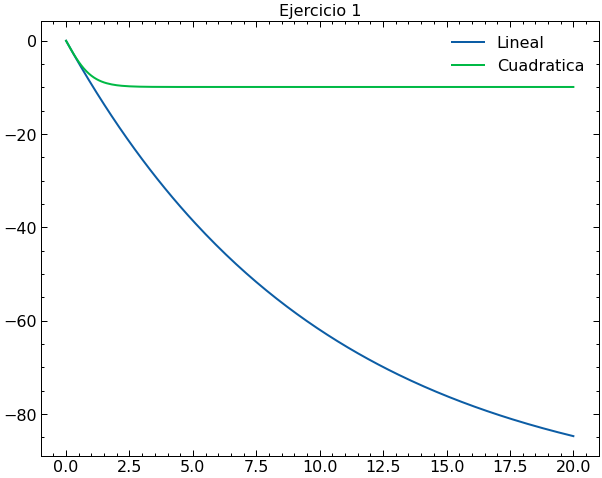

In [240]:
y, tiempo = runge_kutta(lineal, 0.1, vo, 0)
fig3 = plt.figure(figsize=(10,8))
plt.plot(tiempo, y, label = 'Lineal')
y2, t2 = runge_kutta(cuadratica, 0.1, vo, 0)
plt.plot(t2, y2, label = 'Cuadratica')
plt.title('Ejercicio 1')
plt.legend()

## Problema 2
 Resuelva Numéricamente el siguiente problema de valor de frontera, cuya solución exacta
analítica esta dada por la siguiente función: 

$$ x^2 u^{\prime \prime} +xu^{\prime}+u=\dfrac{1}{x}; \hspace{1cm} u(1)=1;\hspace{1cm} u(2)=0$$

para $h = \frac{b-a}{N}$ con $N=6$ y $N=30$

Despejamos $u^{\prime \prime}$:
$$ u^{\prime \prime}+ \dfrac{1}{x}u^{\prime} +\dfrac{1}{x^2} = \dfrac{1}{x^3}$$
$$ \dfrac{1}{4 h^2}[u_{i+1,j} + u_{i,j+1} + u_{i-1,j} + u_{i,j-1}] +\dfrac{1}{x2h}[u_{i+1}-u_{i-1}]= \dfrac{1}{x^3}-\dfrac{1}{x^2} $$